# Analyse des Données sur les Victimes de Crimes

Ce notebook présente une analyse exploratoire des données relatives aux victimes de crimes. L'objectif principal est de comprendre les caractéristiques démographiques et les circonstances entourant ces événements tragiques.

## Résumé des Étapes Clés

1.  **Importation des Bibliothèques:**
    * Importation des bibliothèques essentielles telles que `pandas`, `matplotlib.pyplot` et `seaborn` pour la manipulation et la visualisation des données.
2.  **Chargement des Données:**
    * Chargement du dataset à partir d'un fichier CSV nommé "homicide-data.csv".
3.  **Nettoyage et Préparation des Données:**
    * Suppression des colonnes non pertinentes pour l'analyse.
    * Remplacement des valeurs manquantes dans la colonne 'age' par la médiane.
    * Création de la colonne 'ageBracket' pour catégoriser l'âge des victimes.
4.  **Analyse Exploratoire des Données (EDA):**
    * Visualisation de la distribution des victimes par genre à l'aide d'un diagramme circulaire.
    * Analyse de la répartition des tranches d'âge des victimes via un histogramme.
    * Examen des lieux de décès des victimes à travers un graphique à barres.
    * Étude de la relation entre l'âge et le lieu de décès des victimes à l'aide d'un graphique à barres.
5.  **Identification du Profil Type de la Victime:**
    * Détermination du profil type de la victime en regroupant les données par genre, tranche d'âge et lieu de décès, puis en identifiant le groupe le plus fréquent.

## Présentation

Ce notebook offre une vue d'ensemble des données sur les victimes de crimes, en mettant en lumière les tendances clés et les caractéristiques importantes. Les visualisations graphiques facilitent la compréhension des relations entre différentes variables, telles que l'âge, le genre et le lieu de décès des victimes. L'analyse aboutit à l'identification du profil type de la victime, ce qui peut être crucial pour orienter les efforts de prévention et de soutien aux communautés affectées.

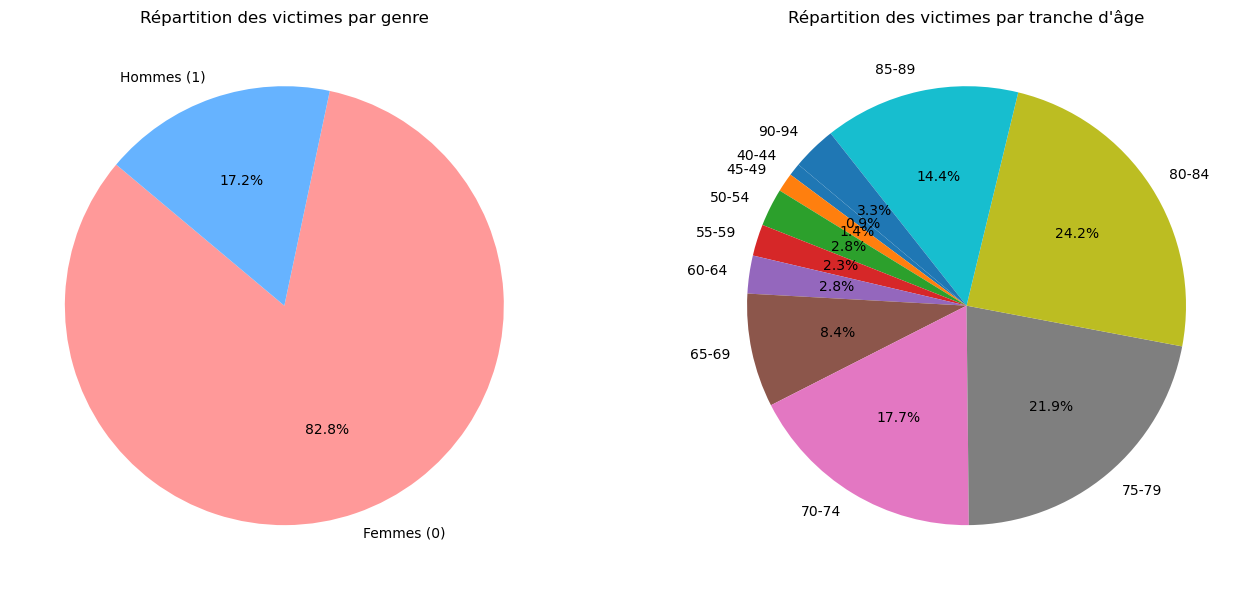

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("shipmanVictim.csv")  # adapte le chemin si nécessaire

# ----- Camembert 1 : Répartition par genre -----
# 0 = femmes, 1 = hommes
gender_counts = df['gender'].value_counts().sort_index()
gender_labels = ['Femmes (0)', 'Hommes (1)']

# ----- Camembert 2 : Répartition par tranche d’âge -----
age_counts = df['ageBracket'].value_counts().sort_index()

# ----- Affichage des deux camemberts -----
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Camembert Genre
axs[0].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=140)
axs[0].set_title('Répartition des victimes par genre')

# Camembert Tranche d'âge
axs[1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title("Répartition des victimes par tranche d'âge")

plt.tight_layout()
plt.show()


# Camembert du nombre de personnes selon la longueur de leur prénom

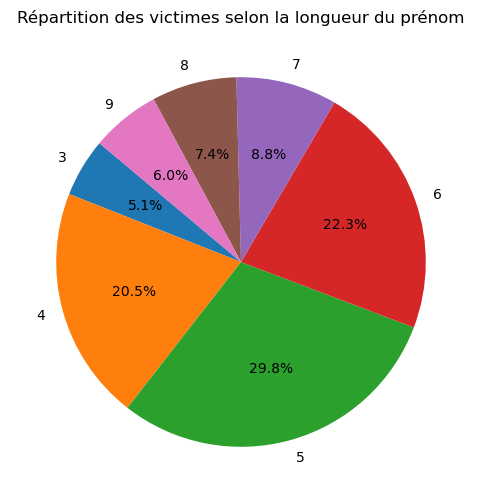

In [2]:
# Extraire le prénom (premier mot du champ "Name")
df['FirstName'] = df['Name'].apply(lambda x: str(x).split()[0])

# Calculer la longueur des prénoms
df['FirstNameLength'] = df['FirstName'].apply(len)

# Compter combien de personnes ont chaque longueur de prénom
name_length_counts = df['FirstNameLength'].value_counts().sort_index()

# Camembert des longueurs de prénom
plt.figure(figsize=(8, 6))
plt.pie(name_length_counts, labels=name_length_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des victimes selon la longueur du prénom")
plt.show()


# Camembert des lettres les plus fréquentes dans tous les prénoms

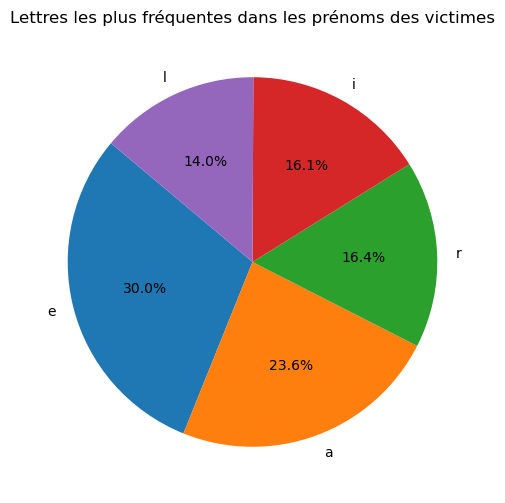

In [3]:
from collections import Counter

# Récupérer tous les prénoms en une seule chaîne
all_names = ''.join(df['FirstName']).lower()

# Compter la fréquence des lettres alphabétiques
letter_counts = Counter(c for c in all_names if c.isalpha())

# Garder les 5 lettres les plus fréquentes (modifiable)
top_letters = dict(letter_counts.most_common(5))

# Camembert des lettres les plus fréquentes
plt.figure(figsize=(8, 6))
plt.pie(top_letters.values(), labels=top_letters.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Lettres les plus fréquentes dans les prénoms des victimes")
plt.show()


# Répartition des victimes par année de décès.

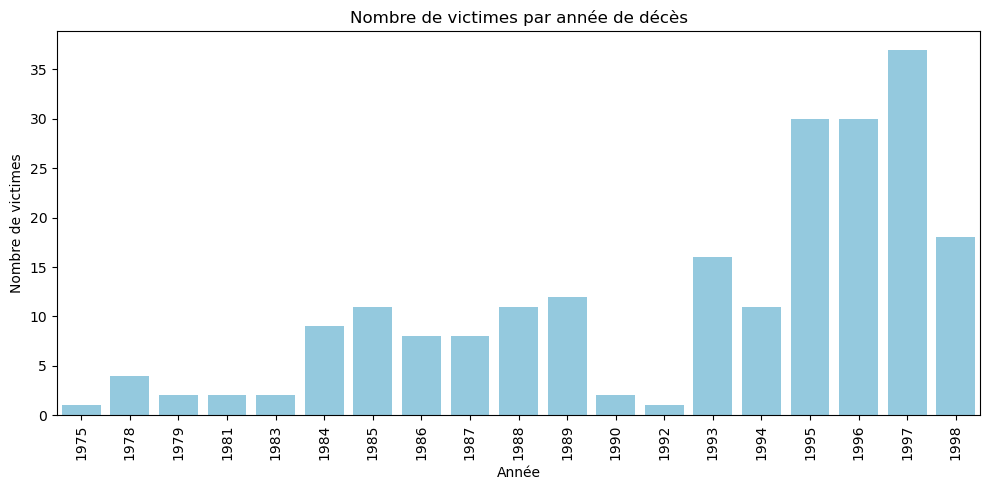

In [3]:
# Rechargement des bibliothèques et du fichier après reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Chargement du fichier CSV
df = pd.read_csv("shipmanVictim.csv")

# Extraction du prénom
df['FirstName'] = df['Name'].apply(lambda x: str(x).split()[0])

# Reprise de l'analyse depuis le début

# 1. Répartition des victimes par année de décès
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='yearOfDeath', color='skyblue')
plt.xticks(rotation=90)
plt.title("Nombre de victimes par année de décès")
plt.xlabel("Année")
plt.ylabel("Nombre de victimes")
plt.tight_layout()
plt.show()


# Répartition des victimes par lieu de décès. 

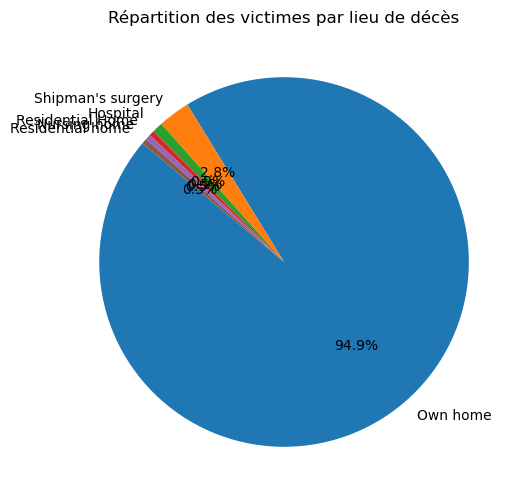

In [7]:
# 2. Répartition des lieux de décès
place_counts = df['PlaceofDeath'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des victimes par lieu de décès")
plt.show()


# âge moyen des victimes selon le genre.

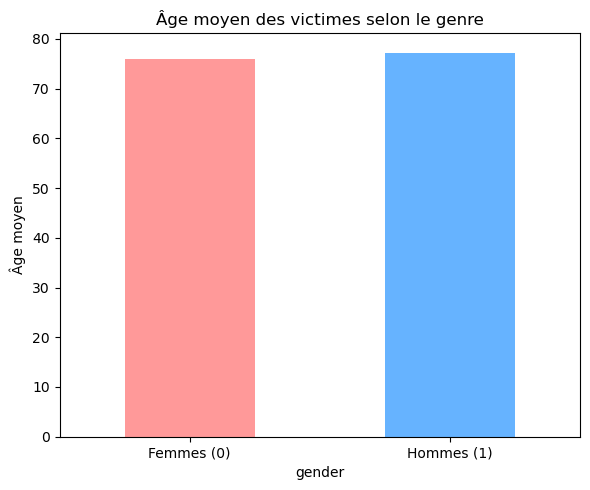

In [8]:
# 3. Âge moyen des victimes selon le genre
gender_age_means = df.groupby('gender')['Age'].mean()

plt.figure(figsize=(6, 5))
gender_age_means.plot(kind='bar', color=['#ff9999', '#66b3ff'])
plt.xticks([0, 1], ['Femmes (0)', 'Hommes (1)'], rotation=0)
plt.ylabel("Âge moyen")
plt.title("Âge moyen des victimes selon le genre")
plt.tight_layout()
plt.show()



La Moyenne d'age entre les hommes et les femmes est la meme , il ne fesait pas de particularité sur ce point ci .

# Les prénoms les plus fréquents

C:\Users\zakar\AppData\Local\Temp\ipykernel_23456\2824021564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_firstnames.index, y=top_firstnames.values, palette='viridis')


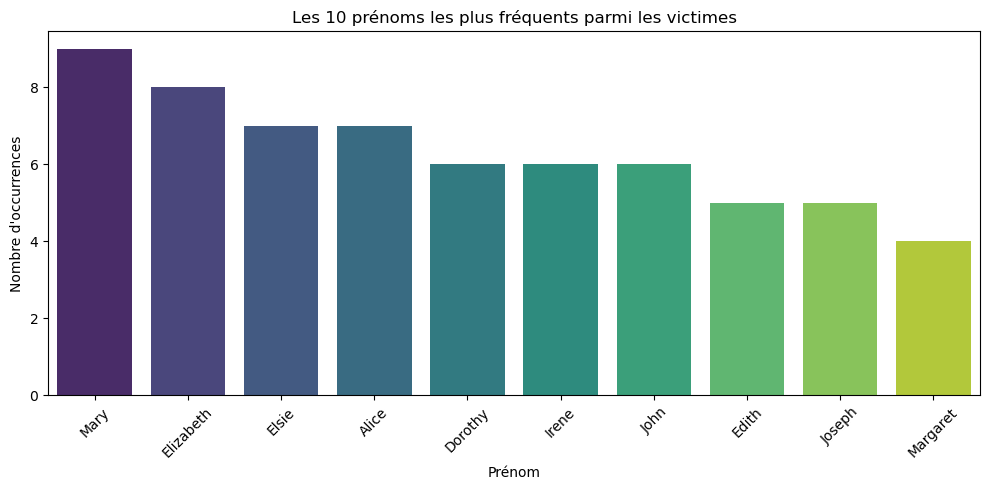

In [4]:
# 10 prénoms les plus fréquents


top_firstnames = df['FirstName'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_firstnames.index, y=top_firstnames.values, palette='viridis')
plt.title("Les 10 prénoms les plus fréquents parmi les victimes")
plt.ylabel("Nombre d'occurrences")
plt.xlabel("Prénom")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Corrélation entre âge et lieu de décès

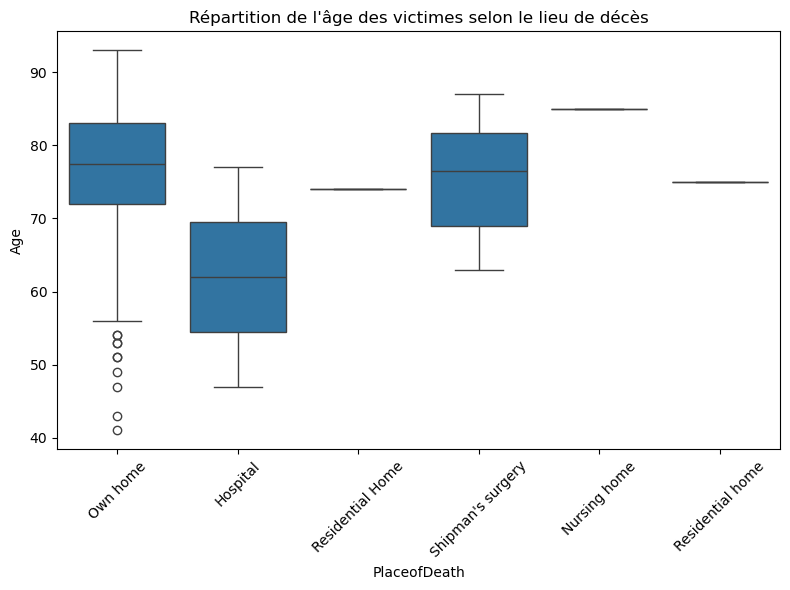

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='PlaceofDeath', y='Age')
plt.title("Répartition de l'âge des victimes selon le lieu de décès")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Profil type de la victime

In [11]:
# Affichage du profil le plus fréquent
profile = df.groupby(['gender', 'ageBracket', 'PlaceofDeath']).size().reset_index(name='count')
profile_sorted = profile.sort_values(by='count', ascending=False)

# Afficher le profil le plus représenté
print("Profil type de la victime :")
print(profile_sorted.head(1))


Profil type de la victime :
    gender ageBracket PlaceofDeath  count
13       0      80-84     Own home     42
